<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [441]:
import pandas as pd
titanic=pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked# Mục mới

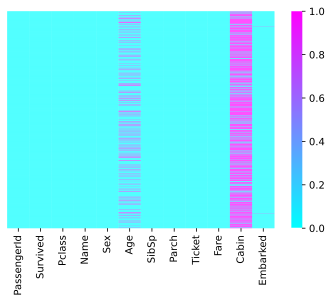

In [442]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(titanic.isna(),
            yticklabels=False,
            cmap='cool')

Nhận xét: Dữ liệu ở 3 cột Age, Cabin, Embarked bị thiếu, hầu như dữ liệu bị thiếu ở cột Cabin và Age mức độ phân bố dày đặc nhất là ở Cabin.

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.

In [443]:
titanic[['firstName','secondName']]=titanic['Name'].str.split(',',expand=True)

In [444]:
titanic=titanic.drop('Name',axis=1)

In [445]:
titanic.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina


1. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [446]:
Sex = titanic['Sex']
for i in range(len(Sex)):
  if  Sex[i] == 'male':
    titanic.Sex[i] = 'M'
  if  Sex[i] == 'female':
    titanic.Sex[i] = 'F'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [447]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,F,19.0,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,F,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,M,26.0,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


2. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau:

Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. 

Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 

Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

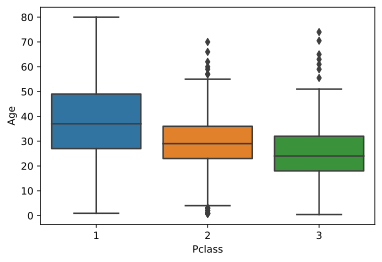

In [448]:
import seaborn as sns
sns.boxplot(y='Age',x='Pclass',data=titanic)

Nhận xét: Phân phói tuổi ở Pclass=1 có dạng chuẩn hơn so với  Pclass=2,3.

Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

In [449]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [468]:
titanic=titanic.round(2).head(10)

Thống kê và trực quan hóa lại dữ liệu sau khi thay thế giá trị bị thiếu ở cột Age.

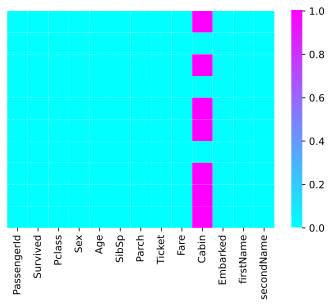

In [451]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
sns.heatmap(titanic.isna(),
            yticklabels=False,
            cmap='cool')

Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: 

(age =< 12]  Kid; 

(12, 18]: Teen, 

(18, 60]: Adult 

( age > 60): Older

In [452]:
for i in titanic['Age']:
  titanic.loc[(titanic['Age']) <=12,'Age Group']='Kid'
  titanic.loc[(titanic['Age']>12) & (titanic['Age']<=18),'Age Group']='Teen'
  titanic.loc[(titanic['Age']>18)&(titanic['Age']<=60),'Age Group']='Adult'
  titanic.loc[(titanic['Age']>60),'Age Group']='Older'

In [469]:
titanic.head(10)

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,familySize,Alone,typeCabin
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult,2,0,Unknown
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult,2,0,C
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult,1,0,Unknown
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult,2,0,C
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult,1,0,Unknown
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult,1,0,Unknown
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult,1,0,E
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid,5,0,Unknown
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult,3,0,Unknown
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen,2,0,Unknown


Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName

In [454]:
titanic[['namePrefix','SecondName']]=titanic['secondName'].str.split('. ',1,expand=True)


In [455]:
titanic=titanic.drop('secondName',axis=1)

In [456]:
titanic.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,Age Group,namePrefix,SecondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Braund,Adult,Mr,Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Cumings,Adult,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Heikkinen,Adult,Miss,Laina
3,4,1,1,F,35.0,1,0,113803,53.10,C123,S,Futrelle,Adult,Mrs,Jacques Heath (Lily May Peel)


In [457]:
# Sắp xếp cột lại xíu !!!
titanic=titanic[['PassengerId','namePrefix','namePrefix','SecondName','Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Age Group']]

In [458]:
titanic.head(10)

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen


Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [459]:
titanic['familySize'] = 1+ titanic['SibSp'] + titanic['Parch']


In [460]:
titanic.head(10)

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,familySize
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult,2
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult,2
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult,1
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult,2
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult,1
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult,1
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult,1
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid,5
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult,3
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen,2


Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [461]:
import numpy as np
titanic['Alone']=[1 if i == 0 else 0 for i in titanic['familySize']]

In [462]:
titanic

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,familySize,Alone
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult,2,0
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult,2,0
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult,1,0
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult,2,0
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult,1,0
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult,1,0
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult,1,0
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid,5,0
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult,3,0
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen,2,0


Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

In [463]:
titanic['typeCabin']=titanic['Cabin'].str.extract('(\D)',expand=True)

In [464]:
titanic.head(10)

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,familySize,Alone,typeCabin
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult,2,0,NaN
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult,2,0,C
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult,1,0,NaN
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult,2,0,C
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult,1,0,NaN
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult,1,0,NaN
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult,1,0,E
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid,5,0,NaN
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult,3,0,NaN
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen,2,0,NaN


In [465]:
titanic['typeCabin']=titanic['typeCabin'].fillna('Unknown')

In [466]:
titanic

,PassengerId,namePrefix,namePrefix,SecondName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,familySize,Alone,typeCabin
0,1,Mr,Mr,Owen Harris,0,3,M,22.0,1,0,A/5 21171,7.25,NaN,S,Adult,2,0,Unknown
1,2,Mrs,Mrs,John Bradley (Florence Briggs Thayer),1,1,F,38.0,1,0,PC 17599,71.28,C85,C,Adult,2,0,C
2,3,Miss,Miss,Laina,1,3,F,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Adult,1,0,Unknown
3,4,Mrs,Mrs,Jacques Heath (Lily May Peel),1,1,F,35.0,1,0,113803,53.10,C123,S,Adult,2,0,C
4,5,Mr,Mr,William Henry,0,3,M,35.0,0,0,373450,8.05,NaN,S,Adult,1,0,Unknown
5,6,Mr,Mr,James,0,3,M,29.7,0,0,330877,8.46,NaN,Q,Adult,1,0,Unknown
6,7,Mr,Mr,Timothy J,0,1,M,54.0,0,0,17463,51.86,E46,S,Adult,1,0,E
7,8,Master,Master,Gosta Leonard,0,3,M,2.0,3,1,349909,21.08,NaN,S,Kid,5,0,Unknown
8,9,Mrs,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,F,27.0,0,2,347742,11.13,NaN,S,Adult,3,0,Unknown
9,10,Mrs,Mrs,Nicholas (Adele Achem),1,2,F,14.0,1,0,237736,30.07,NaN,C,Teen,2,0,Unknown


Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).

In [467]:
titanic[titanic.Survived.isin([0,1])].groupby(['Survived','Sex']).agg({'Sex':'count'})

,,Sex
Survived,Sex,
0,M,5
1,F,5
